## Homework 3
 

* Note use the *vpython* module not the *visual* module for Exercise 3.5. Put the *canvas()* at the beginning of your program to create a graphics window.



## Exercise 3.5

 The innermost six planets of our solar system revolve around the
Sun in roughly circular orbits that all lie approximately in the same
(ecliptic) plane.  Here are some basic parameters:

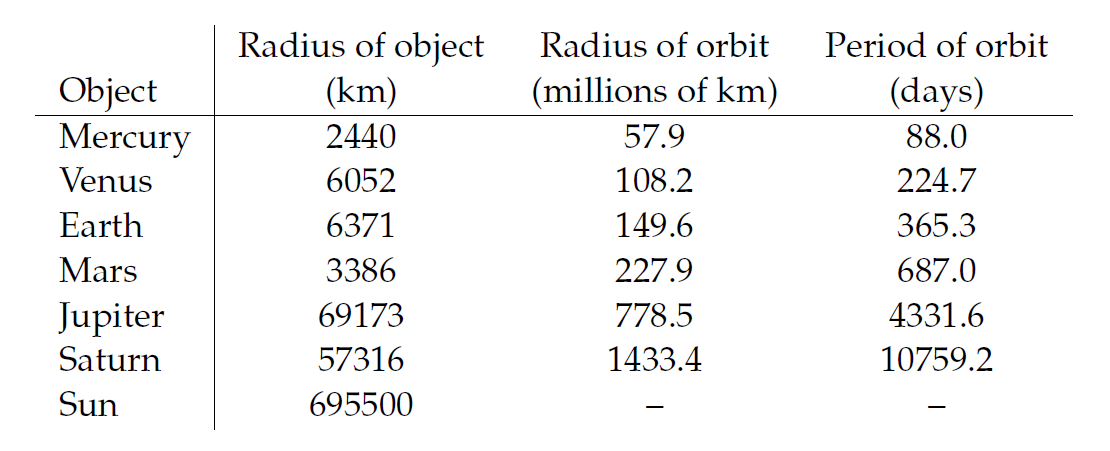

Using *vpython* functions, create an
animation of the solar system that shows the following:

**a)** The Sun and planets as spheres in their appropriate positions and
  with sizes proportional to their actual sizes.  Because the radii of the
  planets are tiny compared to the distances between them, represent the
  planets by spheres with radii $c_1$ times larger than their correct
  proportionate values, so that you can see them clearly.  Find a good
  value for $c_1$ that makes the planets visible.  You'll also need to find
  a good radius for the Sun.  Choose any value that gives a clear
  visualization.  (It doesn't work to scale the radius of the Sun by the
  same factor you use for the planets, because it'll come out looking much
  too large.  So just use whatever works.)  For added realism, you may also
  want to make your spheres different colors.  For instance, Earth could be
  blue and the Sun could be yellow.
  
  Hints: 
  
- Calculate a scale factor that maps the planet orbits onto your *canvas()* frame, e.g. make the diameter of the largest planetary orbit span ~90% of the frame. Multiply this scale factor by $c_1$ to set the planet radii.
- You may find it useful to store the sphere variables representing the planets in an array of the kind described on page 115.
- I find a value $c_1 = 2000$ works. 
- For even more realism you can add [textures](https://www.glowscript.org/docs/VPythonDocs/textures.html) to the planets to create realistic looking surfaces.

In [15]:
"""
Program: ex3.5_visualization_of_the_solar_system
Purpose: Visualize the motion of the inner 6 planets around the Sun to scale
Does it work?: Yes
Other information: 
   
* The package is vpython not visual
* Need to use the vpython function vector to specify position
* VPython7 uses function canvas() to set window properties not display()
* canvas() uses keyword 'ambient' to set color of foreground objects, not 'foreground'
* Create a canvas first before running otherwise console and browser tab freeze/hang
* Here I use numpy function rint to convert an array to integers, int function is scalar.


"""

import vpython as vp
import math as m
import numpy as np 

# Set size of display window
xwidth=600
ywidth=500

# Draw blank screen. I need this otherwise console freezes.
vp.canvas(width=xwidth, height=ywidth)

# Scale factor to scale planet radii. 
# This is non-physical but adjusted for visuals
c1 = 2000

# number of planets
n_planets = 6

# Create an array to hold the sphere objects
planets = np.empty(n_planets, vp.sphere)

# Colors of planets. The color keyword inside the sphere() requires RGB vector
# In order, white, yellow, blue, red, orange, white
rgb1 = [1,1,0,1,1,1]
rgb2 = [1,1,0,0,0.6,1]
rgb3 = [1,0,1,0,0,1]

# textures of planets
p_textures=["vp.textures.earth","vp.textures.earth","vp.textures.earth","vp.textures.earth","vp.textures.earth","vp.textures.earth"]

# Create array to store initial positions of each planet
x_o = np.empty([n_planets], int)
y_o = np.empty([n_planets], int)

# Create array to store radii of each planet, km
R = np.array([2440,6052,6371,3386,69173,57316], float)

# Create an array to store orbital radii of each planet, km
r_orbit = np.array([57.9e6,108.2e6,149.6e6,227.9e6,778.5e6,1433.4e6], float)

# Create an array to store orbital periods, days
T = np.array([88.0,224.7,365.3,687.0,4331.6,10759.2], float)

# Calculate angular velocity for each planet, rad/day
omega = 2*m.pi/T

# Grab the largest planet radius to determine scaling
r_max_orbit = np.max(r_orbit)

# Set scale factor so largest orbit spans 90% of canvas width
r_scale = 0.9*xwidth/(2*r_max_orbit)

# Determine initial position of planets using grid scale. 
# Here I scale the planetary orbits and convert to integers since I am setting grid position in pixels
# Places planets on right of screen
x_o = 0 + np.rint(r_scale*r_orbit)
y_o[:] = 0  

# Place Sun at center (origin) of window
Sun = vp.sphere(pos=vp.vector(0,0,0),radius=7, color=vp.color.yellow)

# Draw each planet at initial position. 
# Use c1 to scale the planets' radii to visualize, since radius scale is different than orbit scale. 
for p in range(n_planets):
    # set texture for Earth
    if p==2:
        planets[p] = vp.sphere(pos=vp.vector(x_o[p], y_o[p], 0), radius=c1*r_scale*R[p], texture=vp.textures.earth)
    # set texture for Jupiter
    elif p==4:
        planets[p] = vp.sphere(pos=vp.vector(x_o[p], y_o[p], 0), radius=c1*r_scale*R[p], texture="https://i.imgur.com/1U8ZyZNb.jpg")
    # set texture and ring for Saturn
    elif p==5:
        planets[p] = vp.sphere(pos=vp.vector(x_o[p], y_o[p], 0), radius=c1*r_scale*R[p], texture=vp.textures.metal)
        s_ring = vp.ring(pos=vp.vector(x_o[p], y_o[p], 0), axis=vp.vector(-0.3,0.8,0), radius=c1*r_scale*R[p]+0.5*c1*r_scale*R[p], thickness=0.2*c1*r_scale*R[p], color=vp.color.white)
    # otherwise use solid color
    else:
        planets[p] = vp.sphere(pos=vp.vector(x_o[p], y_o[p], 0), radius=c1*r_scale*R[p], color=vp.vector(rgb1[p], rgb2[p], rgb3[p]))
    

<IPython.core.display.Javascript object>

**/10 pts**

**b)** The motion of the planets as they move around the Sun (by making the
  spheres of the planets move).  In the interests of alleviating boredom,
  construct your program so that time in your animation runs a factor of
  $c_2$ faster than actual time.  Find a good value of $c_2$ that makes the
  motion of the orbits easily visible but not unreasonably fast.  Make use
  of the *rate* function to make your animation run smoothly.  
  
  


In [16]:
# Create new canvas to display animation
vp.canvas(width=xwidth, height=ywidth)

# Need to redraw the Sun and planets before animation
Sun = vp.sphere(pos=vp.vector(0,0,0),radius=7, color=vp.color.yellow)
for p in range(n_planets):
    # set texture for Earth
    if p==2:
        planets[p] = vp.sphere(pos=vp.vector(x_o[p], y_o[p], 0), radius=c1*r_scale*R[p], texture=vp.textures.earth)
    # set texture for Jupiter
    elif p==4:
        planets[p] = vp.sphere(pos=vp.vector(x_o[p], y_o[p], 0), radius=c1*r_scale*R[p], texture="https://i.imgur.com/1U8ZyZNb.jpg")
    # set texture and ring for Saturn
    elif p==5:
        planets[p] = vp.sphere(pos=vp.vector(x_o[p], y_o[p], 0), radius=c1*r_scale*R[p], texture=vp.textures.metal)
        s_ring = vp.ring(pos=vp.vector(x_o[p], y_o[p], 0), axis=vp.vector(-0.3,0.8,0), radius=c1*r_scale*R[p]+0.5*c1*r_scale*R[p], thickness=0.2*c1*r_scale*R[p], color=vp.color.white)
    # otherwise use solid color
    else:
        planets[p] = vp.sphere(pos=vp.vector(x_o[p], y_o[p], 0), radius=c1*r_scale*R[p], color=vp.vector(rgb1[p], rgb2[p], rgb3[p]))
    
          
# Specify the number of earth years to run animation
nyear = 10

# Loop through time in unit of days and adjust position of each planet after each step
for t in range (0, nyear*365):
    # Calculate the angular position of each planet using its angular velocity
    theta = omega*t
    for p in range(0,6):
        # Calculate Cartesian coords of each planet and draw at new position
        x = r_scale*r_orbit[p]*m.cos(theta[p])
        y = r_scale*r_orbit[p]*m.sin(theta[p])
        # Pause 1/120 seconds between frames
        vp.rate(120)
        planets[p].pos = vp.vector(x, y, 0)
        # also move Saturns' ring
        if p==5:
            s_ring.pos = vp.vector(x, y, 0)

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

**/5 pts**

**Total Exercise Pts /15**

## Exercise 4.3 

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:

\begin{equation*}
{ df\over dx} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.
\end{equation*}

On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.

**a)** Write a program that defines a function _f(x)_ returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  


In [16]:
"""
Program: ex4.3_calculating_derivatives
Purpose: Demonstrates the limits of estimating a numerical derivative
Does it work?: Yes
Other information:

# Part a: Calculate the numerical derivative of f(x) = x(x-1) at x=1 using delta=0.01
# Answer =   1.010000000000001
# Analytic answer = 1
"""

import numpy as np

# user-defined function to be numerically differentiated
def f(x):
    f = (x*(x-1))
    return (f)

# user-defined function to calculate derivative
def differentiate(f,x,delta):
    f_p = (f(x+delta)-f(x))/delta
    return (f_p)

# main program

# prompt user for delta and convert to float
delta = float(input("Enter delta: "))

# prompt user for the x-value to evaluate derivative
x = float(input("Enter x: "))

# Calculate the numerical derivative
fp_x = differentiate(f,x,delta)

print(f"The derivative df/dx evaluated at {x} is {fp_x}.")

Enter delta: 0.01
Enter x: 1
The derivative df/dx evaluated at 1.0 is 1.010000000000001.


**Estimated value of derivative:**  1.010000000000001

**Calculate the true value of the same derivative analytically and compare with the answer your program gives.  The two will not agree perfectly.  Why not?**


**True value of derivative:** 1

**Explanation:** We're only approximating the derivative using $\delta=10^{-2}$, so we don't expect the answer to be exact.

**Pts /5**

**b)** Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  Have your program output the derivative for each. Record derivatives in table below. You should see that the accuracy of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

In [21]:
# Calculate the derivative for different values of delta

# put delta values in array
delta = np.array([1e-2,1e-4,1e-6,1e-8, 1e-10, 1e-12, 1e-14])

# calculate derivative using each delta value
fp_x = differentiate(f,x,delta)

for results in zip(delta,fp_x):
    print(f"delta = {results[0]} f'(1)={results[1]} error={100*(results[1]-1)/1:.2e}%")


delta = 0.01 f'(1)=1.010000000000001 error=1.00e+00%
delta = 0.0001 f'(1)=1.0000999999998899 error=1.00e-02%
delta = 1e-06 f'(1)=1.0000009999177333 error=1.00e-04%
delta = 1e-08 f'(1)=1.0000000039225287 error=3.92e-07%
delta = 1e-10 f'(1)=1.000000082840371 error=8.28e-06%
delta = 1e-12 f'(1)=1.0000889005833413 error=8.89e-03%
delta = 1e-14 f'(1)=0.9992007221626509 error=-7.99e-02%


 
|delta|f'(1)|%error|
|:----|:-----:|----:|
|1e-2|1.010000000000001|1.00e+00|
|1e-4|1.0000999999998899|1.00e-02|
|1e-6|1.0000009999177333|1.00e-04|
|1e-8|1.0000000039225287|3.92e-07| 
|1e-10|1.000000082840371|8.28e-06|
|1e-12|1.0000889005833413|8.89e-03|
|1e-14|0.9992007221626509|-7.99e-02|



**Explanation:**  We see the error in our estimate decreases down to $\delta=10^{-8}$ but then increases for smaller values of $\delta$. The error is a combination of the approximation error in the derivative due to our use of a non-zero finite $\delta$, plus the numerical or rounding error in our estimate. The approximation error will always decrease with decreasing $\delta$. However, the relative numerical error increases with decreasing $\delta$ because the difference in the numerator of the derivative gets smaller and smaller as $\delta$ increases. Later in Chapter 5 we will find the most accurate result occurs when we choose $\delta$ to be about the square root of the error constant or $\delta=10^{-8}$. 


**Pts /5**

**Total Exercise Pts /10**

## Exercise 5.3

Consider the integral

\begin{equation*}
E(x) = \int_0^x e^{-t^2} \>d t.
\end{equation*}

**a)** Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in
  steps of 0.1 using the **trapezoidal rule** and 20 slices. 

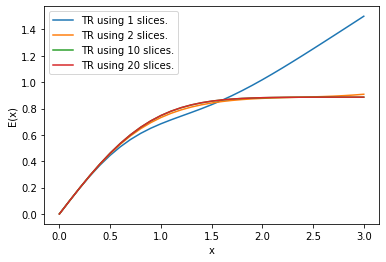

In [37]:
"""
Program: ex5.3
Purpose: Calcluate the integral using both the trapezoidal and Simpson's rule. 
Does it work?: Yes

Part a: Calculate integral using the trapezoidal rule. Even though the problem doesn't call for it,
I estimate the integral using a range of N and plot each estimate together. 
"""

import numpy as np
import matplotlib.pyplot as plt

# define function to return integrand
def f(t):
    return np.exp(-t**2)

# define function to estimate the integral using the trapezoidal rule
# pass integration interval (a,b), and the number of slices N.
def trapezoidalR(a,b,N):
    # determine slice width h
    h = (b-a)/N
    
    # initialize I at the endpoints of the interval
    I = 0.5*(f(a) + f(b))

    # add in contributions from middle slices
    for k in range(1, N):
        I += f(a+k*h)
    
    # multiply sum by h and return
    return h*I
    
# main body

# Create a list of number slices N
N_list = [1,2,10,20]

# set the lower end of integration range, upper end varies
a = 0

# create an array that samples x-values from x=0, 3 in steps of 0.1
xvalues = np.arange(0, 3.1, 0.1)

# calculate E(x) for each x in xvalues using trapezoidal rule and N slice
for N in N_list:
    E_TR = trapezoidalR(a,xvalues, N)
    
    # plot E(x) vs x
    plt.plot(xvalues, E_TR, label=f"TR using {N} slices.")

# add labels to plot
plt.xlabel("x")
plt.ylabel("E(x)")
plt.legend()

**Pts /5**

**b)** Now repeat part *a* but now calculate the integral using **Simpson's rule** also using 20 slices. 

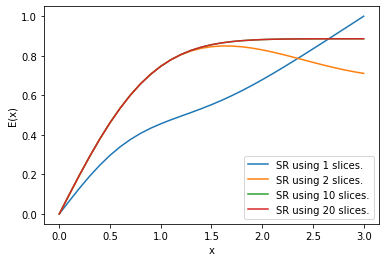

In [36]:
"""
Program: ex5.3
Purpose: Calcluate the integral using both the trapezoidal and Simpson's rule. 
Does it work?: Yes

Part b: Calculate integral using Simpson's rule. Even though the problem doesn't call for it,
I estimate the integral using a range of N and plot each estimate together. 
"""

import numpy as np
import matplotlib.pyplot as plt

# define function to return integrand
def f(t):
    return np.exp(-t**2)

# define function to estimate the integral using the trapezoidal rule
# pass integration interval (a,b), and the number of slices N.
def simpsonsR(a,b,N):
    # determine slice width h
    h = (b-a)/N
    
    # initialize I at the endpoints of the interval
    I = f(a) + f(b)

    # add in contributions from even middle slices
    for k in range(2, N, 2):
        I += 2*f(a+k*h)
        
    # add in contributions from odd middle slices
    for k in range(1, N, 2):
        I += 4*f(a+k*h)
    
    # multiply sum by h/3 and return
    return (h/3.)*I
    
# main body

# Create a list of number slices N
N_list = [1,2,10,20]

# set the lower end of integration range, upper end varies
a = 0

# create an array that samples x-values from x=0, 3 in steps of 0.1
xvalues = np.arange(0, 3.1, 0.1)

# calculate E(x) for each x in xvalues using trapezoidal rule and N slice
for N in N_list:
    E_SR = simpsonsR(a,xvalues, N)
    
    # plot E(x) vs x
    plt.plot(xvalues, E_SR, label=f"SR using {N} slices.")

# add labels to plot
plt.xlabel("x")
plt.ylabel("E(x)")
plt.legend()

**Pts /5**

**c)** Plot and compare the estimates of $E(x)$ you calculated in parts a and b. 

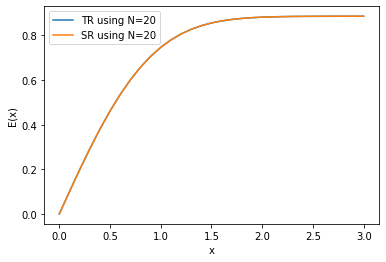

In [38]:
# Plot and compare estimates of E(x) estimate from the TR and SR using 20 slices

# Note since E(x) in parts a and b was lasted calculated using N=20, I don't have to recalculate here

plt.plot(xvalues,E_TR, label="TR using N=20")
plt.plot(xvalues,E_SR, label="SR using N=20")

# add labels to plot
plt.xlabel("x")
plt.ylabel("E(x)")
plt.legend()

We see there is close agreement between the estimates using the two methods. 

**Pts /5**

**Total Exercise Pts /15**

## Exercise 5.4

Our ability to resolve detail in astronomical observations is
limited by the diffraction of light in our telescopes.  Light from stars
can be treated effectively as coming from a point source at infinity.  When
such light, with wavelength $\lambda$, passes through the circular aperture
of a telescope (which we'll assume to have unit radius) and is focused by
the telescope in the focal plane, it produces not a single dot, but a
circular diffraction pattern consisting of central spot surrounded by a
series of concentric rings.  The intensity of the light in this diffraction
pattern is given by

\begin{equation*}
I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,
\end{equation*}

where $r$ is the distance in the focal plane from the center of the
diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.
The Bessel functions $J_m(x)$ are given by

\begin{equation*}
J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) \>d\theta,
\end{equation*}

where $m$ is a nonnegative integer and $x\ge0$.

**a)** Write a Python function _J(m,x)_ that calculates the value of
  $J_m(x)$ using Simpson's rule with $N=1000$ points.  Use your
  function in a program to make a plot, on a single graph, of the Bessel
  functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to
  $x=20$.

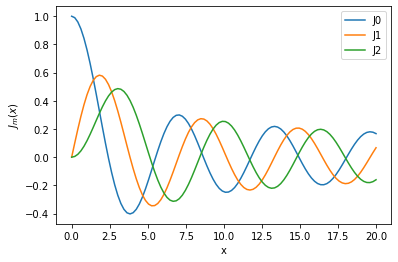

In [58]:
"""

Program: ex5.4_diffraction_limit_of_a_telescope
Purpose: Use Simpson's Rule to evaluate the Bessel function and graph the diffraction pattern of telescope
Does it work?: Yes
Other information: 

Part a: Calculate and graph J0, J1 and J2 from x=0, 20
"""

import numpy as np
import matplotlib.pyplot as plt


# define function to calculate integrand of Bessel function Jm(x)
def f(m,x, theta):
    return np.cos(m*theta-x*np.sin(theta))

# Define function to calculate the mth Bessel function
# Function uses Simpson's rule to evaluate the integral
def J(m,x):
    # limits of integration
    a = 0
    b = np.pi
    
    # number of slices
    N = int(1000)
    
    # slice width
    h = (b-a)/N
    
    #Initialize the estimate I at end points
    I = (f(m,x,a) + f(m,x,b))

    # Sum up odd slices 
    for k in range(1, N, 2):
        I += 4*f(m,x, a+k*h)
    
    # Sum up even slices
    for k in range(2, N, 2):
        I += 2*f(m, x, a+k*h)

    # Multiply the sum by the prefactor
    I = (1/3)*h*I
    
    # return the Bessel function
    return  (1/np.pi)*I
    

# main body

# We will evaluate the Bessel functions from x=0,20
# Store x-values in np.array. 
x = np.linspace(0,20,100)

# calculate J0 Bessel function
m = 0
J0 = J(m,x)

# calculate J1 Bessel function
m = 1
J1 = J(m,x)

# calculate J2 Bessel function
m = 2
J2 = J(m,x)
    
# plot J0, J1, J2 on same plot
plt.plot(x,J0, label="J0")
plt.plot(x,J1, label="J1")
plt.plot(x,J2, label="J2")

# add labels
plt.legend()
plt.xlabel("x")
plt.ylabel(r"$J_m(x)$")
plt.show()

**Pts /10**

**b)** Make a second program that makes a density plot of the intensity of
  the circular diffraction pattern of a point light source with
  $\lambda=500\,$nm, in a square region of the focal plane, using the
  formula given above.  Your picture should cover values of $r$ from zero
  up to about $1\,\mu$m.
  
Hint: The central spot in the
diffraction pattern is so bright that it may be difficult to see the rings around it on the computer
screen. If you run into this problem a simple way to deal with it is to use one of the other color
schemes for density plots described in Section 3.3. The “hot” scheme works well. For a more
sophisticated solution to the problem, the imshow function has an additional argument vmax
that allows you to set the value that corresponds to the brightest point in the plot. For instance,
if you say “imshow(x,vmax=0.1)”, then elements in x with value 0.1, or any greater value, will
produce the brightest (most positive) color on the screen. By lowering the vmax value, you can
reduce the total range of values between the minimum and maximum brightness, and hence
increase the sensitivity of the plot, making subtle details visible. (There is also a vmin argument
that can be used to set the value that corresponds to the dimmest (most negative) color.) For
this exercise a value of vmax=0.01 appears to work well.
  

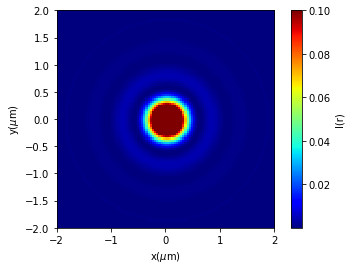

In [65]:
# Part b
# Create a density plot of diffraction pattern for a specified wavelength
# The problem says to plot I up to r=1 um so I define a square grid that goes from -1um to +1um along each dimension.

# wavelength, nm (can't name variable lambda since that is a reserved word)
l = 500.

# calculate wave number, nm-1
k = 2*pi/l

# set p_width, the size of diffraction pattern, nm (p_width = 2*1um)
p_width = 2.e3

# define the number of pixels along one dimension (make this odd so center of pattern is in exact center of array)
Npix = 101

# determine the index of pixel at center of pattern
half = Npix/2

# calculate the physical size of a pixel, nm/pixel
scale = p_width/Npix

# create an Npix X Npix array to hold the diffraction pattern
diffraction = np.zeros([Npix,Npix], float)

# loop over the x and y dimensions of focal plane to calculate the diffraction intensity
for i in range(Npix):
    for j in range(Npix):
        # calculate r, the physical distance from current pixel to center, in nm
        r = scale*np.sqrt((i-half)**2 + (j-half)**2)
        kr = k*r
        # I(kr) will blow up when r=0 so check and replace with a high but reasonable value
        if (kr == 0):
            diffraction[j,i] = 0.2
        else:
            diffraction[j,i] = (J(1.,kr)/kr)**2
        
            
plt.jet()
# use keyword vmax so lower intensity fringes are visible
plt.imshow(diffraction, vmax=0.1, extent=[-2,2,-2,2])
#plt.imshow(diffraction)
plt.xlabel(r"x($\mu$m)")
plt.ylabel(r"y($\mu$m)")
plt.colorbar(label = "I(r)")
plt.show()

**Pts /10**

**Total Exercise Pts /20**

## Exercise 5.6

a) Write a program, or modify an earlier one, to once more calculate
the value of the integral $\int_0^2 (x^4 - 2x + 1) \>d x$ from
Example (5.28), using the trapezoidal rule with $20$ slices, but this time
have the program also print an estimate of the error on the result,
calculated using the method of Eq. (5.28).  To do this you will need to
evaluate the integral twice, once with $N_1=10$ slices and then again with
$N_2=20$ slices.  Then Eq. (5.28) gives the error. 

In [55]:
"""
Program: ex5.6_error_on_trapezoidal_rule
Purpose: Calculate the approximation error on the TR three different was
Does it work?: Yes
Other information: 
    
N1=10, I1=4.50656
N2 = 20, I2 = 4.426660000000001
error = 0.026633333333333137

The error calculated using the Euler-Maclaurin method is 0.02. 
"""

# define function to calculate integrand
def f(x):
    return(x**4 -2*x +1)

# define function to estimate the integral using the trapezoidal rule
# pass integration interval (a,b), and the number of slices N.
def trapezoidalR(a,b,N):
    # determine slice width h
    h = (b-a)/N
    
    # initialize I at the endpoints of the interval
    I = 0.5*(f(a) + f(b))

    # add in contributions from middle slices
    for k in range(1, N):
        I += f(a+k*h)
    
    # multiply sum by h and return
    return h*I

# main body

# set integration interval
a = 0
b = 2

# First estimate the integral using N slices
N = 10
I1 = trapezoidalR(a,b,N)

# Next estimate the integral using twice the number of slices
I2 = trapezoidalR(a,b,2*N)

# Next calculate the approximation error using eq (5.28)
err = abs ((1/3)*(I2-I1))

print(f"I1={I1:0.3f}, I2={I2:0.3f}.")
print(f"Estimate of error using (1/3)(I2-I1)={err}.")
print(f"True error = {abs(4.4-I2)}.")

I1=4.507, I2=4.427.
Estimate of error using (1/3)(I2-I1)=0.026633333333333137.
True error = 0.026660000000000572.


**Estimate of error using Eq. 5.28:** 0.026633333333333137

How does the error calculated in this manner compare with a direct computation of the error as
the difference between your value for the integral and the true value
of 4.4?  Why do the two not agree perfectly?

**Explanation:** The estimate of the error is close to but not exactly the true error since we can never know the true error. If we did, we would know the true value of the integral so there would be no need to numerically estimate the integral. The best we can do is estimate the error. 

**Pts /10**

b) Also calculate the error using the *Euler-Maclaurin formula* of Eq. (5.20). How does this compare with your other two estimates of the error?

**Estimate of error using the Euler-Maclaurin formula:**

The Euler-Maclaurin formula is:

$
\epsilon \frac{1}{12}h^2\left[f'(a) - f'(b)\right]
$

and

$
f'(x) = 4x^3 - 2
$

So $f'(0) = -2$ and $f'(2) = 30$. Therefore $\epsilon = 0.026667$, which is close to the true error but again not exact because it is only an estimate of the true error.  


**Pts /5**

**Total Exercise Pts /15**

**Total Pts /75**